In [1]:
# Housing Market Project 1
# Collaborators: Jackie Bai, Rosalyn Brown & Thomas Scott
#Due Date: June 15th, 2021 (presentation - June 8th)

In [1]:
#We probably won't need all of these, but better to have them.
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import csv
import requests
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data sets

#Fannie Histrical performance dataset

FM_Hist_Performance = Path('../Data/HistoricalPerformance.csv')

#Fannie Orgination dataset

FM_Historical_Origination = Path('../Data/HistoricalOrigination.csv')

#St. Louis Fed: Fed Funds Rate

Fed_Funds = Path('../Data/FEDFUNDS.csv')

#St. Louis Fed: 30 yr mtg interest rates (remember to weigh against schiller)

Fixed_rate_mtg = Path('../Data/Freddie_Mac_30_yr_Fixed_Rate.csv')

#S&P Schiller home price index

Schiller_index = Path('../Data/CSUSHPINSA.csv')

In [3]:
# Create dataframes

#Fannie Histrical performance

FM_Hist_Performance_df = pd.read_csv(FM_Hist_Performance, encoding='Latin-1')

#Fannie Orgination

FM_Historical_Origination_df = pd.read_csv(FM_Historical_Origination, encoding='Latin-1')

#St. Louis Fed: Fed Funds Rate

Fed_Funds_df = pd.read_csv(Fed_Funds)

#St. Louis Fed: 30 yr mtg interest rates (remember to weigh against schiller)

Fixed_rate_mtg_df = pd.read_csv(Fixed_rate_mtg)

#S&P Schiller home price index

Schiller_index_df = pd.read_csv(Schiller_index)

In [4]:
#Display sample dataframe

Schiller_index_df.head()

,DATE,CSUSHPINSA
0,2000-01-01,104.776083
1,2001-01-01,113.184333
2,2002-01-01,122.286833
3,2003-01-01,133.740750
4,2004-01-01,150.463333


In [5]:
##Merge datasets into consolidated dataframe & drop nulls

Combined_dataframe = pd.concat([FM_Hist_Performance_df, FM_Historical_Origination_df.drop(columns='Unnamed: 0'), Fixed_rate_mtg_df.drop(columns='DATE'), Fed_Funds_df.drop(columns='DATE'), Schiller_index_df.drop(columns='DATE')], axis = 1).dropna()

#Reset index and drop duplicate index
                         
Combined_df = Combined_dataframe.reset_index().drop(columns='index')

#Rename year column

Combined_df.rename(columns = {'Unnamed: 0': 'Year'}, inplace = True)

#Display data

Combined_df.head(21)

#Note to collaborators, all the data/ columns are present in the dataframe. 
#Jupyter just adds the ... to save space and display the data in an abridged format. 
#Try exporting the data to a CSV using 'to_csv' in pandas and you will see what I mean.

,Year,Number of Records,Origination UPB ($M),% Active,% Prepay,% Repurchase,% TPS,% Short Sale,% REO,% NPL,...,Average CLTV,Average DTI,Average Note Rate,% Investor,% Cashout,% CA,WA Risk Layers,MORTGAGE30US,FEDFUNDS,CSUSHPINSA
0,2000,"1,268,238","$160,749",0.21%,94.34%,0.18%,0.10%,0.05%,0.71%,0.01%,...,77.90%,35.40%,8.10%,3.60%,14.30%,14.30%,0.68,8.053462,6.235833,104.776083
1,2001,"3,371,992","$472,779",0.35%,89.92%,0.10%,0.08%,0.05%,0.60%,0.02%,...,73.20%,33.30%,6.85%,3.90%,31.70%,18.10%,0.81,6.967885,3.887500,113.184333
2,2002,"3,857,380","$564,732",0.70%,84.44%,0.10%,0.09%,0.06%,0.60%,0.03%,...,69.90%,32.90%,6.31%,4.50%,33.70%,19.20%,0.81,6.537308,1.666667,122.286833
3,2003,"5,107,654","$778,021",1.69%,73.00%,0.10%,0.16%,0.13%,0.79%,0.07%,...,67.90%,32.60%,5.54%,4.50%,34.20%,20.90%,0.81,5.826981,1.127500,133.740750
4,2004,"1,744,573","$274,074",2.63%,74.07%,0.15%,0.25%,0.43%,1.66%,0.15%,...,70.90%,35.70%,5.69%,4.10%,34.50%,18.20%,0.94,5.839231,1.349167,150.463333
5,2005,"1,446,029","$252,240",3.46%,73.89%,0.23%,0.38%,1.42%,3.43%,0.27%,...,71.70%,37.60%,5.78%,3.80%,43.40%,14.20%,1.02,5.866731,3.213333,171.779083
6,2006,"1,080,688","$198,677",3.30%,76.35%,0.38%,0.39%,2.22%,4.92%,0.34%,...,72.50%,38.80%,6.39%,4.90%,42.60%,11.80%,1.07,6.413269,4.964167,183.482167
7,2007,"1,252,482","$245,737",3.76%,76.42%,0.83%,0.38%,2.40%,5.34%,0.42%,...,74.30%,38.90%,6.33%,6.10%,41.10%,11.70%,1.08,6.337308,5.019167,179.944250
8,2008,"1,491,789","$315,022",2.96%,82.55%,0.71%,0.19%,1.13%,2.58%,0.23%,...,73.30%,37.90%,5.96%,6.40%,32.00%,18.40%,0.81,6.027170,1.927500,164.062500
9,2009,"2,363,088","$522,072",5.48%,79.26%,0.12%,0.05%,0.15%,0.37%,0.05%,...,67.80%,33.60%,4.91%,2.90%,31.50%,20.90%,0.56,5.036538,0.160000,148.551167


In [7]:
# save combined dataframe to csv file
Combined_df.to_csv(r'combined_df.csv', index = False, header=True)

In [8]:
#Define functions

In [9]:
#1. Parallel plot of total loan volume & interest rate (Tom)

In [10]:
#2. Create bar plot of FICO scores for period between 2000-2020 (Tom)

In [11]:
#3. Show heatmap correlation for FICO & LTV (remember to remove percentage) (Tom)

In [12]:
#4. Show investor property correlation percentage to cash out refi percentage (Tom)

In [13]:
#5. Interest rate correlated with home price index (weighted) (Tom)

In [14]:
#6. Percent change of orig. UPD in $ with percentage change in LTV (Rosalyn)

In [15]:
#7. Plot percent of investment property vs. cash out refi (Rosalyn)

In [16]:
#8. Correlate investor/ cashout refi and show as a heat map (Rosalyn)

In [17]:
#9. Plot interest rate against number of loans (weight number of loans by dividing by number of million and casting to float)
#(Rosalyn)

In [18]:
#10. Plot prepayment percentage versus interest rate (Rosalyn)

In [16]:
#11. Prepayment versus Case-Schiller index (prepayment down as asset prices increase) (Jackie)
df11 = Combined_df[['Year', '% Prepay', 'CSUSHPINSA']]
df11['Year'] = df11['Year'].astype(str)

#df11 = df11.set_index('Year')
df11['% Prepay'] = df11['% Prepay'].str.replace(r'%', r'').astype('float')               # convert percentage string to numerical type

#df11.hvplot.bar(
#    x='Year', 
#    y=['% Prepay', 'CSUSHPINSA'], 
#    xlabel='Year', 
#    ylabel='Percentage of Loans Prepaid, Case-Schiller Home Price Index', 
#    rot=90, width=900, height=500)

In [17]:
df11.head()

,Year,% Prepay,CSUSHPINSA
0,2000,94.34,104.776083
1,2001,89.92,113.184333
2,2002,84.44,122.286833
3,2003,73.00,133.740750
4,2004,74.07,150.463333


Text(0, 0.5, 'Case-Schiller Home Price Index')

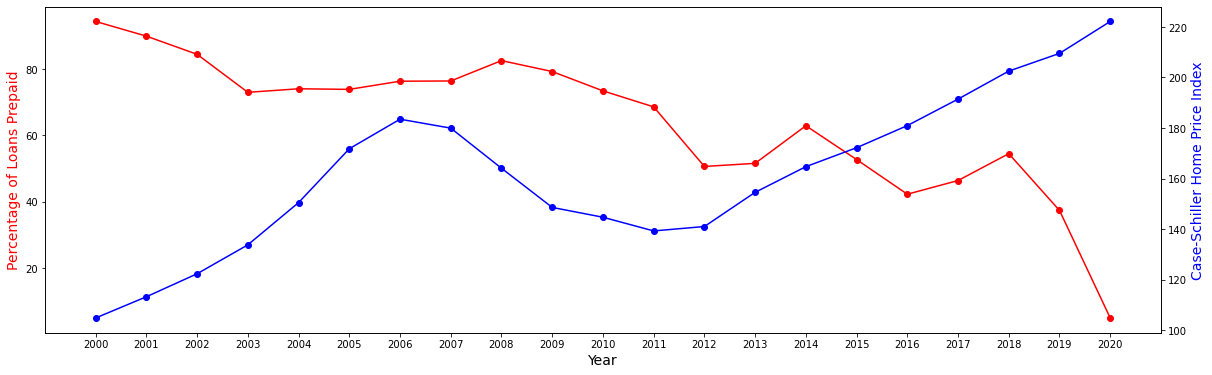

In [18]:
# create figure and axis objects with subplots()
#plt.figure(figsize=(3,4))
fig,ax = plt.subplots(figsize=(20,6))
# make a plot
ax.plot(df11.Year, df11['% Prepay'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Percentage of Loans Prepaid",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df11.Year, df11['CSUSHPINSA'],color="blue",marker="o")
ax2.set_ylabel("Case-Schiller Home Price Index",color="blue",fontsize=14)


In [34]:
# save the plot as a file
fig.savefig('11.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [50]:
line = df11.hvplot.line(
          title="% Prepay vs. Asset Price over past 20 years",
          x='Year', 
          y=['% Prepay', 'CSUSHPINSA'], 
          xlabel='Year', 
          ylabel='% Prepay, asset_price_index', yaxis="left")

scatter = df11.hvplot.scatter(
               x='Year', 
               y=['% Prepay', 'CSUSHPINSA']
             )

line * scatter

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Year]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Scatter   [Year]   (value)

Text(0, 0.5, 'Average LTV (%)')

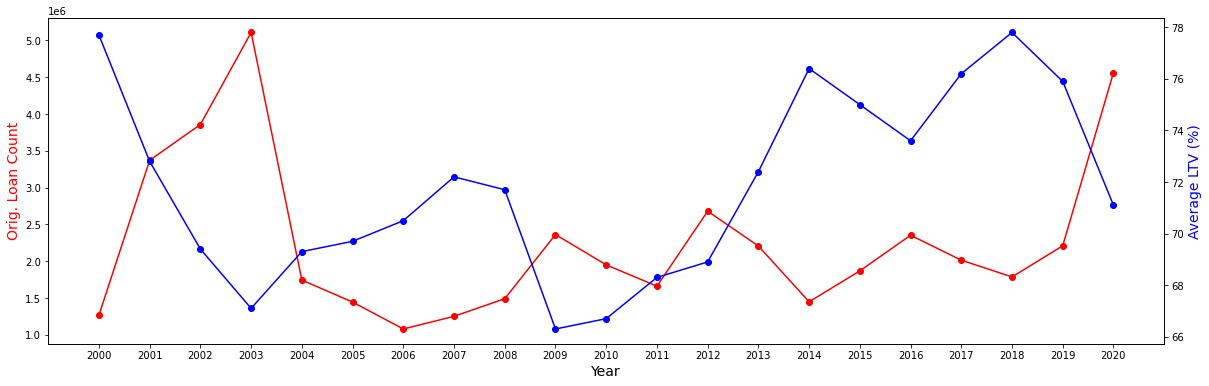

In [19]:
#12. Plot loan volume vs. LTV (Jackie)
df12 = Combined_df[['Year', 'Orig. Loan Count', 'Average LTV']]

df12['Year'] = df12['Year'].astype(str)

df12['Average LTV'] = df12['Average LTV'].str.replace(r'%', r'').astype('float')               # convert percentage string to numerical type
df12['Orig. Loan Count'] = df12['Orig. Loan Count'].str.replace(r',', r'').astype('int')

# Make a figure
fig,ax = plt.subplots(figsize=(20,6))
# make a plot
ax.plot(df12.Year, df12['Orig. Loan Count'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Orig. Loan Count",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df12.Year, df12['Average LTV'],color="blue",marker="o")
ax2.set_ylabel("Average LTV (%)",color="blue",fontsize=14)

Text(0, 0.5, 'Average Borrower FICO')

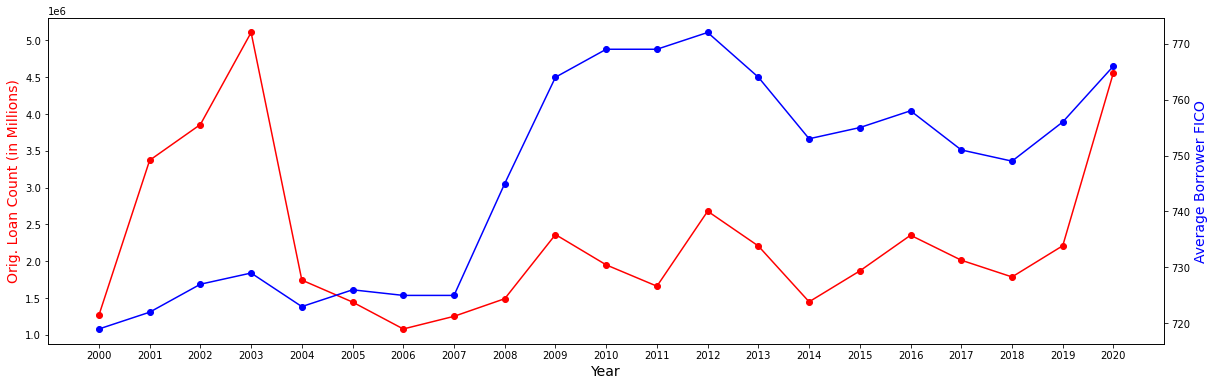

In [21]:
#13. Plot FICO vs. Loan volume (Jackie)
df13 = Combined_df[['Year', 'Average Borrower FICO', 'Orig. Loan Count']]

df13['Year'] = df13['Year'].astype(str)
df13['Orig. Loan Count'] = df13['Orig. Loan Count'].str.replace(r',', r'').astype('int')

# Make a figure
fig,ax = plt.subplots(figsize=(20,6))
# make a plot
ax.plot(df13.Year, df13['Orig. Loan Count'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Orig. Loan Count (in Millions)",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df13.Year, df13['Average Borrower FICO'],color="blue",marker="o")
ax2.set_ylabel("Average Borrower FICO",color="blue",fontsize=14)

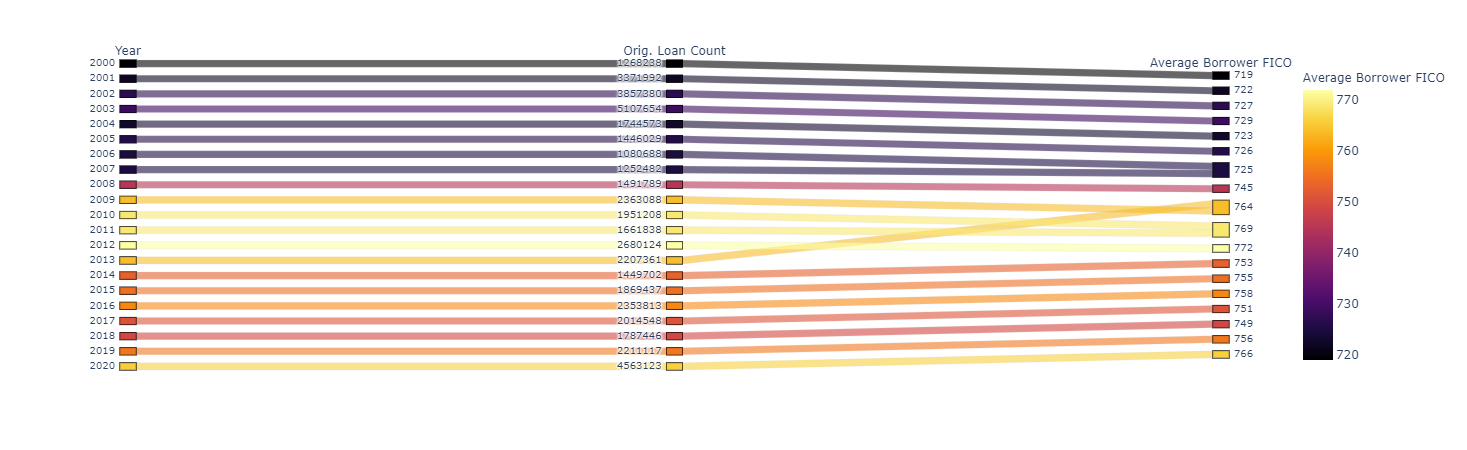

In [74]:
# Parallel Coordinates Plot
px.parallel_categories(
    df13,
    dimensions=["Year", "Orig. Loan Count", "Average Borrower FICO"],
    color="Average Borrower FICO",
    color_continuous_scale=px.colors.sequential.Inferno,
)

In [78]:
#14. Plot DTI vs. LTV (Jackie)
df14 = Combined_df[['Year', 'Average DTI', 'Average LTV']]
df14['Average LTV'] = df14['Average LTV'].str.replace(r'%', r'').astype('float') 
df14['Average DTI'] = df14['Average DTI'].str.replace(r'%', r'').astype('float')

line = df14.hvplot.line(
          title="DTI vs. LTV",
          x='Year', 
          y=['Average DTI', 'Average LTV'], 
          xlabel='Year', 
          ylabel='Average DTI, Average LTV', yaxis="left")

scatter = df14.hvplot.scatter(
               x='Year', 
               y=['Average DTI', 'Average LTV']
             )

line * scatter

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Year]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Scatter   [Year]   (value)

Text(0, 0.5, 'Average Borrower FICO')

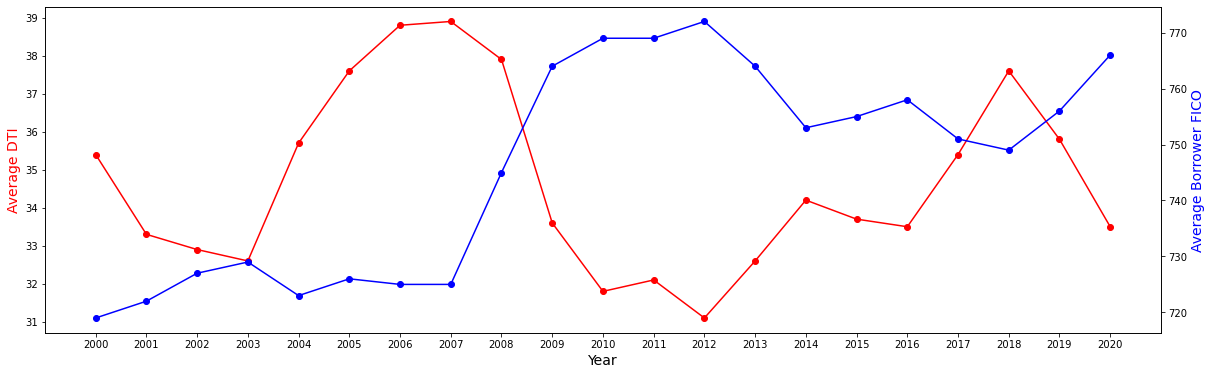

In [22]:
#15. Plot DTI vs. FICO (Jackie)
df15 = Combined_df[['Year', 'Average DTI', 'Average Borrower FICO']]
df15['Year'] = df15['Year'].astype(str)
df15['Average DTI'] = df15['Average DTI'].str.replace(r'%', r'').astype('float')


# Make a figure
fig,ax = plt.subplots(figsize=(20,6))
# make a plot
ax.plot(df15.Year, df15['Average DTI'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Average DTI",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df15.Year, df15['Average Borrower FICO'],color="blue",marker="o")
ax2.set_ylabel("Average Borrower FICO",color="blue",fontsize=14)

In [85]:
df15

,Year,Average DTI,Average Borrower FICO
0,2000,35.4,719
1,2001,33.3,722
2,2002,32.9,727
3,2003,32.6,729
4,2004,35.7,723
5,2005,37.6,726
6,2006,38.8,725
7,2007,38.9,725
8,2008,37.9,745
9,2009,33.6,764


In [86]:
df15['Average DTI'] = df15['Average DTI']*10
df15.hvplot.bar(
    x='Year', 
    y=['Average DTI', 'Average Borrower FICO'], 
    xlabel='Year', 
    ylabel='Average DTI, Average Borrower FICO', 
    rot=90, width=900, height=500)

:Bars   [Year,Variable]   (value)

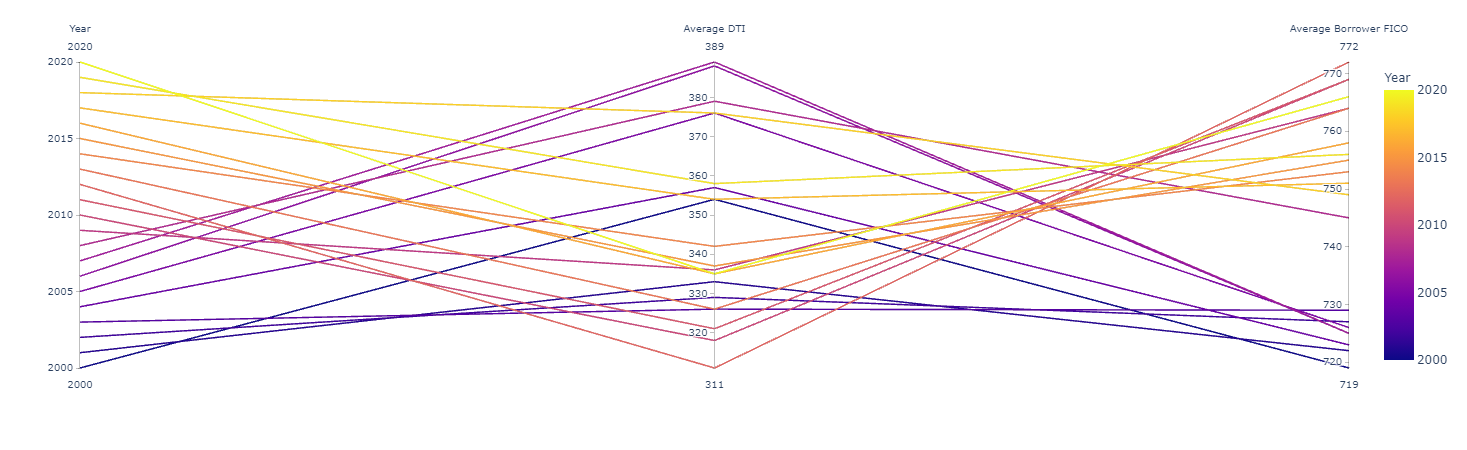

In [95]:
px.parallel_coordinates(df15, color='Year')

In [ ]:
#16. Plotly widget 1 (group)

In [ ]:
#17. Plotly widget 2 (group)

In [96]:
load_dotenv()

True

In [ ]:
#18. Bonus 
#Lagging indicators - US GDP from Quandl API
quandl_api_key = os.getenv("QUANDL_API_KEY")

# Define the base request URL
request_url = "https://www.quandl.com/api/v3/datasets/WIKI/MSFT.json?api_key="

# Concatenate request_url and api_key. Store as new variable
request_url = request_url + quandl_api_key

# Execute get request
response_data = requests.get(request_url)

# Output data
response_data.content

#Leading indicators - Russell 3000  ETF data from Alpaca API, unemployment figures from Quandle & CPI from BLS.gov